In [18]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [19]:
# %load get_df
def get_df(yr):
    return pd.read_csv(f'inputs/Environmental_Data_Deep_Moor_{yr}.csv')


In [20]:
# %load get_seasons

def get_seasons( yr ): 
    
    df = get_df(yr)
    
    return [ df[df['date'].between(f'{yr}_03_20', f'{yr}_06_19')],
             df[df['date'].between(f'{yr}_06_20', f'{yr}_09_21')],
             df[df['date'].between(f'{yr}_09_22', f'{yr}_12_20')],
             df[df['date'].between(f'{yr}_03_20', f'{yr}_12_20')]
           ]
              


In [21]:
# %load table_helpers.py

def max_temp(s): 
    return s[s['Air_Temp'] == s['Air_Temp'].max()]

def min_temp(s): 
    return s[s['Air_Temp'] == s['Air_Temp'].min()]

def min_max_temps(yr):
    return [ 
        (
            max_temp(s)['Air_Temp'].values[0],
            max_temp(s)['date'].values[0],
            min_temp(s)['Air_Temp'].values[0],
            min_temp(s)['date'].values[0]
        ) for s in get_seasons(yr)
    ]

    


In [22]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
heights = [season['Air_Temp'].mean() for season in get_seasons('2013')]

In [23]:
alphas = [ height/max(heights) for height in heights]
colors = [(.3, .7, .9, a) for a in alphas]

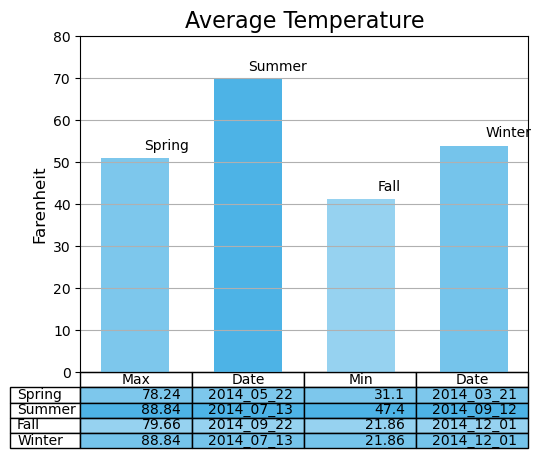

In [27]:
plt.bar(seasons, heights, .6, align='center', color=colors)
plt.title('Average Temperature', fontsize=16)
plt.ylabel('Farenheit', fontsize=12)
rows = seasons
columns = ['Max', 'Date', 'Min', 'Date']
plt.table( cellText=min_max_temps('2014'),
           rowLabels=rows,
           colLabels=columns,
           cellColours=[[c]*4 for c in colors],
           loc='bottom'
         )
plt.xticks([])
[plt.text(i, h+2, s) for i, h, s in zip([.08,1,2.15,3.1], heights, seasons)]
plt.ylim(0, 80)
plt.subplots_adjust(left=0.2, bottom=.1, top=.8)
plt.grid(True)
plt.show()